# Inspecting my collection with data visualisation tools

<a target="_blank" href="https://colab.research.google.com/github/impresso/impresso-datalab-notebooks/blob/main/explore-vis/entity_network.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

If something doesn't work, you can [report a problem](https://github.com/impresso/impresso-datalab-notebooks/blob/main/reporting-problems.md).

## What is this notebook about?

This notebook provides you with basic tools for a data-driven inspection of your collection using data visualisation tools. By plotting several charts, it should facilitate the identification of the nature of the content you have stored in your collection, helping with analysing your corpus or even planning ammendments to the content you collected.  Moreover, this notebook aims at fostering data/source criticism by raising awareness on the origing of Impresso metadata and quality of digitised materials.    

## Why is this useful?
These visualisations can be useful for revealing trends or aspects of your collection that you did not realise before or for presenting your collection to different audiences.

## What will you learn?

In this notebook, you will learn how to:
* Load and manage dataframes using Pandas library;
* Create visualisations using Python libraries such as Plotly;
* Critically interpret the data you have saved in your collection.

## Recommended resources

- [How Charts Lie](https://web.archive.org/web/20241110022144/https://stephencredmond.medium.com/a-review-of-how-charts-lie-by-alberto-cairo-2763286237a6) by Alberto Cairo (2019) provides a comprehensive introduction to critical data visualisation;
- [Getting started with Plotly in Python](https://plotly.com/python/getting-started/) is a tutorial for those unfamiliar with the library.
- [From the shelf to the web: exploring historical newspapers in the digital age](https://ranke2.uni.lu/u/exploring-historical-newspapers/) deals with how digitised newspapers that are available online change the way historians use newspapers as historical sources, and ask new skills for applying source criticism.

> Quick tip: Code in Jupyter notebooks must be run in sequence. If something does not work, double-check if you forgot to run a previous cell.

# Introduction: Loading the data

First step is to load your csv file into the Colab notebook. We use the function 'read' in Pandas to load the csv as a dataframe

In [2]:
# Import .csv file retrieved from Web App and load the file as Pandas dataframe
import pandas as pd
dataframe = pd.read_csv('Olympics_1948.csv', skiprows=4, delimiter=';', on_bad_lines='skip')

Now, you can inspect your Pandas dataframe. By running `dataframe.info()`

In [3]:
# This shows how many columns you have, how many entries,the name of the columns and the type of values you have in each column.
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   uid                              1457 non-null   object 
 1   access_right                     1457 non-null   object 
 2   collections                      1457 non-null   object 
 3   content                          1457 non-null   object 
 4   content_provider                 1457 non-null   object 
 5   country                          1457 non-null   object 
 6   date                             1457 non-null   object 
 7   is_content_available             1457 non-null   bool   
 8   is_olr                           1457 non-null   bool   
 9   is_on_front_page                 1457 non-null   bool   
 10  issue                            1457 non-null   object 
 11  language                         1457 non-null   object 
 12  locations_mentioned 

You can also preview the first rows of your dataframe by running `dataframe.head()`

In [ ]:
# Try here

# Part 1: Creating my first chart (step-by-step)

To create charts, we are going to use a library called [Plotly](https://plotly.com/python/). Let's import it first.

In [4]:
import plotly.express as px

You can now start exploring our collection by ploting charts.

Below, we demonstrate how to plot a bar chart showing how many articles you have in your collection by newspaper. Let's do it step-by-step:
1. First, you need to count how many articles you have by newspaper. We do this by counting how many times each newspaper ID occurs in column 'newspaper' of dataframe

In [5]:
# Count values in column 'newspaper' of dataframe
newspaper_counts = dataframe['newspaper'].value_counts().reset_index()

In [6]:
# Visualise your counts
newspaper_counts

,newspaper,count
0,GDL,208
1,DTT,201
2,LLE,198
3,IMP,189
4,JDG,181
5,EXP,171
6,LSE,108
7,luxwort,82
8,FZG,54
9,LCE,38


2. Using Plotly, you can now plot a bar chart with results stored in `newspapers_counts`. We determine axis x as corresponding to column 'newspaper' and axis y as corresponding to column 'count'.

In [25]:
# Plot bar chart using Plotly for dataframe 'newspaper_counts'
fig = px.bar(newspaper_counts, x='newspaper', y='count', title='Count of Articles by Newspaper')

# Define colour as gray scale
fig.update_traces(marker_color='black')

# Show figure
fig.show()

You can also plot a pie chart with the exact same values.

In [8]:
# Pie charts will have 'names' and 'values' instead of axis x and y
fig = px.pie(newspaper_counts, names='newspaper', values='count', title='Count of Articles by Newspaper')

# Layout options to improve readability: include text inside chart. Also include %
fig.update_traces(textposition='inside', textinfo='percent+label')

# Show figure
fig.show()

**Question:** which chart do you think is more useful or more efficient in communicating the data? What are the pros and cons of each of them?

# Part 2: Combining newspaper and content provider

We can plot a treemap to visualise the number of articles by newspaper along with their content provider

In [48]:
# Count values based on columns 'content provider' and 'newspaper'
np_provider_counts = dataframe[['content_provider', 'newspaper']].value_counts().reset_index()

In [49]:
# Take a look at the dataframe with your counts.
np_provider_counts

,content_provider,newspaper,count
0,SNL,GDL,208
1,Migros,DTT,201
2,SNL,LLE,198
3,SNL,IMP,189
4,SNL,JDG,181
5,SNL,EXP,171
6,SNL,LSE,108
7,BNL,luxwort,82
8,SNL,FZG,54
9,SNL,LCE,38


> It is worth noticing that the dataframe looks different. You have now counted values based on two columns, rather than a single column.

In [50]:
# Plot a treemap
fig = px.treemap(np_provider_counts, path=[px.Constant("all"),'content_provider', 'newspaper'], values='count',
                 color='count', color_continuous_scale='Greys',
                 title='Count of articles by Newspaper and their Content Providers')
fig.show()

# Part 3: Temporal distribution of articles

See temporal distribution of articles for a given newspaper using a histogram. In the example below, we look at values for the newspaper Gazette de Lausanne (GDL).

> Bar charts are used to represent categorical data. [Histograms](https://plotly.com/python/histograms/#:~:text=More%20generally%2C%20in%20Plotly%20a,as%20well%20as%20linear%20axes.), in contrast, represent continuous data such as ages, daily temperatures, etc. For dates, histograms can be particularly useful for time-series analysis, to help identify trends over long periods. **Be aware that Gazette de Lausanne will only show up in the chart below if you have a content item by them in your collection.**

In [9]:
# Create a dataframe with values for Gazette de Lausanne (GDL)
df_GDL = dataframe[dataframe['newspaper'] == 'GDL'].copy()

# Define histogram axis
fig = px.histogram(df_GDL, x='date', title=f'Distribution of Articles over time for Gazette de Lausanne')

# Data is aggragated in bins based on month (size in millisecond)
fig.update_traces(xbins=dict(size=30*24*60*60*1000))  # 1 month in ms | To aggregate by day, use 1 day = 24*60*60*1000

# Define colour
fig.update_traces(marker_color='black')

# Show figure
fig.show()

You can also generate a list of histograms, one for each newspaper in your collection by writing a `for loop`.

In [10]:
# Get the earliest and latest dates in dataset
earliest_date = dataframe['date'].min()
latest_date = dataframe['date'].max()

# Get unique list of newspapers
newspapers = dataframe['newspaper'].unique()

# Create separate histograms for each newspaper using a 'for loop'
for newspaper in newspapers:
    df_newspaper = dataframe[dataframe['newspaper'] == newspaper].copy()
    fig = px.histogram(df_newspaper, x='date', title=f'Distribution of Articles over Time for {newspaper}')

    # Data is aggragated in bins based on month (size in millisecond)
    fig.update_traces(xbins=dict(size=30*24*60*60*1000))  # 1 month in ms

    # Always set start of x-axis based on the ealiest date in dataset and end based on the latest.
    fig.update_layout(
        xaxis_range=[earliest_date, latest_date],
    # Always set minimun value of y-axis 0 and max value as 60 (customise as necessary)
        yaxis_range=[0, 60]
    )

    # Define colour
    fig.update_traces(marker_color='black')

    # Show figure
    fig.show()

To facilitate comparison, you can display the histograms in dashboard format.

In [12]:
# Import IPython display and plotly.graph_objects modules to create a dashboard
from IPython.display import display, HTML
import plotly.graph_objects as go

In [13]:
# plot histograms in dashboard side-by-side showing number of articles overtime by newspaper

dashboard_html = """
<html>
<head>
    <style>
        .container {{
            display: flex;
            flex-wrap: wrap;
            gap: 20px;
            justify-content: center; /* Center the items in the container */
        }}
        .chart-item {{
            width: 45%; /* Adjust as needed to have two columns with gap */
            box-shadow: 0 4px 8px 0 rgba(0,0,0,0.2);
            transition: 0.3s;
            padding: 10px;
            box-sizing: border-box; /* Include padding and border in the element's total width and height */
        }}
         .chart-item:hover {{
            box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);
        }}
        h2 {{
            text-align: center;
            width: 100%; /* Make sure title takes full width */
        }}
    </style>
</head>
<body>
    <h2>Data Overview Dashboard</h2>
    <div class="container">
        {newspaper_histograms}
    </div>
</body>
</html>
"""

# Re-generate plots and capture their HTML output
# Histograms for each newspaper
newspaper_histograms_html = ""
newspapers = dataframe['newspaper'].unique()
min_date = dataframe['date'].min()
max_date = dataframe['date'].max()

for newspaper in newspapers:
    newspaper_df = dataframe[dataframe['newspaper'] == newspaper]
    fig = px.histogram(newspaper_df, x='date',
                       labels={'x':'Date', 'y':'Number of Articles'},
                       title=f'Count of content items over time for {newspaper}',
                       range_x=[min_date, max_date])
    fig.update_traces(xbins=dict(size=30*24*60*60*1000))  # 1 month in ms
    fig.update_traces(marker_color='black')
    fig.update_layout(yaxis_range=[0, 60])
    newspaper_histograms_html += f'<div class="chart-item">{fig.to_html(full_html=False, include_plotlyjs="cdn")}</div>'
    # Always set start of x-axis based on the ealiest date in dataset and end based on the latest.


# Populate the dashboard HTML template
full_dashboard_html = dashboard_html.format(
    newspaper_histograms=newspaper_histograms_html,
)

# Display the dashboard
display(HTML(full_dashboard_html))

To visualise the temporal distribution of articles for the whole collection, you can plot a histogram as follows

> Tip: by clicking on the name of the newspapers in the right-hand side column, you can select specific newspapers you want to visualise

In [14]:
# Plot chart to see distribution of articles over time

earliest_latest_dated_per_np = dataframe.groupby('newspaper').agg({'date': ['min', 'max']})
earliest_latest_dated_per_np.columns = ['earliest_date', 'latest_date']

# varying the nbins value provides more or less precision
nbins_value = 366

# stacked histogram
fig = px.histogram(dataframe, x="date", color='newspaper', title=f'Distribution of Articles over Time', nbins=nbins_value)
fig.show()

# Part 4: Visualising metadata

In Part 4 of this notebook, you will plot several charts based on your collection's available metadata such as countries where articles were published, languages, articles sizes and newspaper page in which the article occurs.

At the end of this session, you will be able to load your charts into a dashboard.

In [19]:
# count values on column 'country' and plot a treemap

country_counts = dataframe['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

fig = px.treemap(country_counts, path=['country'], values='count',
                 color='count', color_continuous_scale='Greys',
                 title='Distribution of Countries')
fig.show()

In [21]:
# count values on column 'content_provider' and plot a treemap

content_provider_counts = dataframe['content_provider'].value_counts().reset_index()
content_provider_counts.columns = ['content_provider', 'count']

fig = px.treemap(content_provider_counts, path=['content_provider'], values='count',
                 color='count', color_continuous_scale='Greys',
                 title='Distribution of Content Providers')
fig.show()

In [22]:
# count values on column 'language' and plot a treemap

language_counts = dataframe['language'].value_counts().reset_index()
language_counts.columns = ['language', 'count']

fig = px.treemap(language_counts, path=['language'], values='count',
                 color='count', color_continuous_scale='Greys',
                 title='Distribution of Languages')
fig.show()

In [51]:
# count values in column 'type' and plot pie chart showing distribution

type_counts = dataframe['type'].value_counts().reset_index()
type_counts.columns = ['type', 'count']

gray_shades = ['#111111','#BBBBBB', '#DDDDDD']

fig = px.pie(type_counts, values='count', names='type',
             color_discrete_sequence=gray_shades,
             title='Distribution of Article Types')
fig.show()

In [16]:
# plot chart showing distribution of values in column 'size' and add mark on the average and mean

fig = px.histogram(dataframe, x='size', title='Distribution of Article Sizes', color_discrete_sequence=['grey'])
fig.add_vline(x=dataframe['size'].mean(), line_dash="dash", line_color="red", annotation_text=f"Mean: {dataframe['size'].mean():.2f}", annotation_position="top right")
fig.add_vline(x=dataframe['size'].median(), line_dash="dash", line_color="black", annotation_text=f"Median: {dataframe['size'].median():.2f}", annotation_position="top left")

fig.show()

In [19]:
# plot chart showing distribution of values occuring in column 'pages' and add mark on the average and mean

# Convert 'pages' column to numeric, coercing errors

fig = px.histogram(dataframe.dropna(subset=['pages']), x='pages', title='Distribution of Article Pages', color_discrete_sequence=['grey'])
fig.add_vline(x=dataframe['pages'].mean(), line_dash="dash", line_color="red", annotation_text=f"Mean: {dataframe['pages'].mean():.2f}", annotation_position="top right")
fig.add_vline(x=dataframe['pages'].median(), line_dash="dash", line_color="black", annotation_text=f"Median: {dataframe['pages'].median():.2f}", annotation_position="top left")
fig.show()

In [20]:
# plot chart with count of values in column 'is_on_front_page'

# count values in column 'is_on_front_page' and plot a bar chart
is_on_front_page_counts = dataframe['is_on_front_page'].value_counts().reset_index()
is_on_front_page_counts.columns = ['is_on_front_page', 'count']

fig = px.bar(is_on_front_page_counts, x='is_on_front_page', y='count',
             labels={'is_on_front_page':'On Front Page', 'count':'Number of Articles'},
             title='Count of Articles on Front Page', color_discrete_sequence=['grey'])

fig.show()

## Visualise your charts in a dashboard

Try visualising in full-screen by clicking on the arrow in the output cell (see figure):

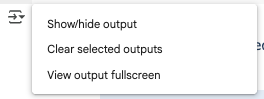

In [43]:
# @title This cell will create a dash board and plot several charts about your collection
# create a dashboard showing all the charts

import pandas as pd
from IPython.display import display, HTML
import plotly.graph_objects as go

# Combine all figures into a single dashboard layout
dashboard_html = """
<html>
<head>
    <style>
        .container {{
            display: flex;
            flex-wrap: wrap;
            gap: 20px;
            justify-content: center; /* Center the items in the container */
        }}
        .chart-item {{
            width: 45%; /* Adjust as needed */
            box-shadow: 0 4px 8px 0 rgba(0,0,0,0.2);
            transition: 0.3s;
            padding: 10px;
            box-sizing: border-box; /* Include padding and border in the element's total width and height */
        }}
         .chart-item:hover {{
            box-shadow: 0 8px 16px 0 rgba(0,0,0,0.2);
        }}
        h2 {{
            text-align: center;
            width: 100%; /* Make sure title takes full width */
        }}
    </style>
</head>
<body>
    <h2>Data Overview Dashboard</h2>
    <div class="container">
        <div class="chart-item">{bar_chart}</div>
        <div class="chart-item">{country_treemap}</div>
        <div class="chart-item">{content_provider_treemap}</div>
        <div class="chart-item">{language_treemap}</div>
        <div class="chart-item">{type_pie_chart}</div>
        <div class="chart-item">{size_histogram}</div>
        <div class="chart-item">{pages_histogram}</div>
        <div class="chart-item">{front_page_bar_chart}</div>
    </div>
</body>
</html>
"""

# Re-generate plots and capture their HTML output
# Bar chart of newspaper counts
newspaper_counts = dataframe['newspaper'].value_counts().reset_index()
newspaper_counts.columns = ['Newspaper', 'Count'] # Rename for clarity in plot
fig_newspaper_bar = px.bar(newspaper_counts, x='Newspaper', y='Count',
             labels={'Newspaper':'Newspaper', 'Count':'Number of Articles'},
             title='Count of content items by newspaper title')
fig_newspaper_bar.update_traces(marker_color='gray')
bar_chart_html = fig_newspaper_bar.to_html(full_html=False, include_plotlyjs='cdn')


# Treemap for countries
country_counts = dataframe['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']
fig_country_treemap = px.treemap(country_counts, path=['country'], values='count',
                 title='Distribution of Countries', color='count', color_continuous_scale='Greys')
country_treemap_html = fig_country_treemap.to_html(full_html=False, include_plotlyjs='cdn')

# Treemap for content providers
content_provider_counts = dataframe['content_provider'].value_counts().reset_index()
content_provider_counts.columns = ['content_provider', 'count']
fig_content_provider_treemap = px.treemap(content_provider_counts, path=['content_provider'], values='count',
                 title='Distribution of Content Providers', color='count', color_continuous_scale='Greys')
content_provider_treemap_html = fig_content_provider_treemap.to_html(full_html=False, include_plotlyjs='cdn')

# Treemap for languages
language_counts = dataframe['language'].value_counts().reset_index()
language_counts.columns = ['language', 'count']
fig_language_treemap = px.treemap(language_counts, path=['language'], values='count',
                 title='Distribution of Languages', color='count', color_continuous_scale='Greys')
language_treemap_html = fig_language_treemap.to_html(full_html=False, include_plotlyjs='cdn')

# Pie chart for article types
type_counts = dataframe['type'].value_counts().reset_index()
type_counts.columns = ['type', 'count']
fig_type_pie = px.pie(type_counts, values='count', names='type',
             title='Distribution of Article Types', color_discrete_sequence=gray_shades)
type_pie_chart_html = fig_type_pie.to_html(full_html=False, include_plotlyjs='cdn')

# Histogram for article sizes
fig_size_hist = px.histogram(dataframe, x='size', title='Distribution of Article Sizes', color_discrete_sequence=['grey'])
fig_size_hist.add_vline(x=dataframe['size'].mean(), line_dash="dash", line_color="red", annotation_text=f"Mean: {dataframe['size'].mean():.2f}", annotation_position="top right")
fig_size_hist.add_vline(x=dataframe['size'].median(), line_dash="dash", line_color="black", annotation_text=f"Median: {dataframe['size'].median():.2f}", annotation_position="top left")
size_histogram_html = fig_size_hist.to_html(full_html=False, include_plotlyjs='cdn')

# Histogram for article pages
dataframe['pages'] = pd.to_numeric(dataframe['pages'], errors='coerce')
fig_pages_hist = px.histogram(dataframe.dropna(subset=['pages']), x='pages', title='Distribution of Article Pages', color_discrete_sequence=['grey'])
fig_pages_hist.add_vline(x=dataframe['pages'].mean(), line_dash="dash", line_color="red", annotation_text=f"Mean: {dataframe['pages'].mean():.2f}", annotation_position="top right")
fig_pages_hist.add_vline(x=dataframe['pages'].median(), line_dash="dash", line_color="black", annotation_text=f"Median: {dataframe['pages'].median():.2f}", annotation_position="top left")
pages_histogram_html = fig_pages_hist.to_html(full_html=False, include_plotlyjs='cdn')


# Bar chart for front page status
is_on_front_page_counts = dataframe['is_on_front_page'].value_counts().reset_index()
is_on_front_page_counts.columns = ['is_on_front_page', 'count']
fig_front_page_bar = px.bar(is_on_front_page_counts, x='is_on_front_page', y='count',
             labels={'is_on_front_page':'On Front Page', 'count':'Number of Articles'},
             title='Count of Articles on Front Page', color_discrete_sequence=['grey'])
front_page_bar_chart_html = fig_front_page_bar.to_html(full_html=False, include_plotlyjs='cdn')


# Populate the dashboard HTML template
full_dashboard_html = dashboard_html.format(
    bar_chart=bar_chart_html,
    country_treemap=country_treemap_html,
    content_provider_treemap=content_provider_treemap_html,
    language_treemap=language_treemap_html,
    type_pie_chart=type_pie_chart_html,
    size_histogram=size_histogram_html,
    pages_histogram=pages_histogram_html,
    front_page_bar_chart=front_page_bar_chart_html)

# Display the dashboard
display(HTML(full_dashboard_html))


# Part 5: Inspecting entities in my collection

In Impresso we have named entities of two different natures: those captured by simpling using NER models and those linked with wikidata. On the Impresso Web App, for example, you only see those linked with wikidata.

Linking entities with wikidata helps with differentiating, for example, whether a mention to 'apple' refers to the company or the fruit, by linking the entity to a unique ID.

However, on the other hand, if we just look at linked entities, we might be ignoring other important entities that either could not be linked to wikidata due to technical limitations of the models, or entities that do not exist in wikidata. Therefore, we will use this notebook to explore both kinds of entities.

The following cells calculates how many content items in my collection have metadata for persons mentioned and how many do not have (labelled as 'nan values')

In [52]:
# count nan values in column 'persons_mentioned' and plot chart showing the percentage of nan values in the dataframe

# Count NaN values in 'persons_mentioned'
nan_count = dataframe['persons_mentioned'].isna().sum()

# Calculate percentage of NaN values
total_rows = len(dataframe)
nan_percentage = (nan_count / total_rows) * 100

print(f"Number of NaN values in 'persons_mentioned': {nan_count}")
print(f"Percentage of NaN values in 'persons_mentioned': {nan_percentage:.2f}%")

# Create a small dataframe for plotting the percentage
nan_data = pd.DataFrame({'Category': ['NaN', 'Not NaN'], 'Percentage': [nan_percentage, 100 - nan_percentage]})

# Plotting the percentage of NaN values
fig = px.pie(nan_data, values='Percentage', names='Category',
             title='Percentage of NaN Values in "persons_mentioned"', color_discrete_sequence=gray_shades)
fig.show()

Number of NaN values in 'persons_mentioned': 189
Percentage of NaN values in 'persons_mentioned': 12.97%


The cell below prints the list of entities (not linked) and the count of documents in which they occur.

In [22]:
# in df_persons, where words in column 'persons_mentioned' are separated by '|', write values in new lines
df_persons = dataframe[['persons_mentioned']]
df_persons_expanded = df_persons['persons_mentioned'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).to_frame('persons_mentioned')

# count occurances of values of df_persons_expanded in column persons_mentioned and output ranking with count of occurances

person_counts = df_persons_expanded['persons_mentioned'].value_counts().reset_index()
person_counts.columns = ['person_mentioned', 'count']

# Display the ranking of persons by count
print("Ranking of Persons Mentioned:")
person_counts


Ranking of Persons Mentioned:


,person_mentioned,count
0,Les Jeux,469
1,Les Suisses,103
2,Bibi Torriani,55
3,M. Brundage,41
4,Les Etats-Unis,40
...,...,...
7405,Raymond Mahnen,1
7406,Robert Bruch,1
7407,Hera Tempel,1
7408,Jean Simmons,1


In the next cell, we can visualise the same data but now in a bar chart, focusing on the top 10 most mentioned persons

In [24]:
# Plot the top 10 persons mentioned

if len(person_counts) > 0:
    top_n = 10  # You can adjust this number
    fig = px.bar(person_counts.head(top_n), x='person_mentioned', y='count',
                 labels={'person_mentioned':'Person', 'count':'Count'},
                 title=f'Top {top_n} Most Mentioned Persons')
    fig.update_layout(xaxis={'categoryorder':'total descending'})
    fig.update_traces(marker_color='black')
    fig.show()
else:
    print("No persons mentioned found in the data.")

Let's now compare the most mentioned persons with the linked entities we have in the Impresso Web App. For that, we need access to the Impresso API.

Run the following cell to install the impresso python library. You may need to restart the kernel to use updated packages. To do so, on Google Colab, go to Runtime and select Restart session.

In [27]:
# Impresso Python Library provides access to the API
%pip install -q impresso

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.6/170.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.9/73.9 kB 5.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.2 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.8 which is incompatible.
google-genai 1.30.0 requires httpx<1.0.0,>=0.28.1, but you have httpx 0.27.2 which is incompatible.
firebase-admin 6.9.0 requires httpx[http2]==0.28.1, but you have httpx 0.27.2 which is incompatible.
ydf 0.13.0 requires protobuf<7.0.0,>=5.29.1, but you have protobuf 4.25.8 which is incompatible.


By running the following cell, we create an instance of the Impresso client and authenticate it with the Impresso API.

> The impresso variable stores an instance of ImpressoClient, which establishes a connection to the API using your authentication token. With this object, you can interact with the API to perform operations such as searching for content items, retrieving entities, and fetching facets.

The following command will prompt you to enter your Impresso token if it has not been authenticated recently (it expires after 8 hours).

To get access to an Impresso API token, go to [Impresso Datalab](https://impresso-project.ch/datalab/) and select Get API Token on the menu.

In [28]:
from impresso import connect

client = connect()


Click on the following link to access the login page: https://impresso-project.ch/datalab/token
 - 🔤 Enter your email/password on this page.
 - 🔑 Once logged in, a secret token will be generated for you.
 - 📋 Copy this token and paste it into the input field below. Then press "Enter". 👇🏼.

🔑 Enter your token: ··········
🎉 You are now connected to the Impresso API!  🎉


Now you can load your collection into this notebook.

In [29]:
# Find my collections and print them ordering by size (descendent)

mycollections = client.collections.find(order_by="-size")
mycollections

,title,description,accessLevel,createdAt,updatedAt,totalItems
uid,,,,,,
local-QrxZkrAx-WRgrUCeY,Olympics,containing Olympischen Spiele or Jeux Olympiq...,private,2025-05-26T08:51:56+00:00,2025-08-21T14:20:25.694000+00:00,9859
local-QrxZkrAx-FR5ADyA_,Titanic event,"containing titanic published from Jan 1, 1872...",private,2025-04-30T12:44:30+00:00,2025-04-30T12:45:15.082000+00:00,1559
local-QrxZkrAx-4weP_Ewp,1948 Olympics,containing Olympischen Spiele or Jeux Olympiq...,private,2025-05-26T13:40:57+00:00,2025-05-26T13:41:38.371000+00:00,1457


In [31]:
# @title Now, copy the uid of the collection you want to inspect and paste here:
collection_id = "local-QrxZkrAx-4weP_Ewp" # @param {"type":"string"}

linked_entities = client.search.facet(
    "person",
    collection_id=collection_id,
    limit=100,
    order_by="-count"
)

linked_entities = linked_entities.df
linked_entities

,count,label
value,,
aida-0001-50-Bibi_Torriani,44,Bibi Torriani
aida-0001-50-Pierre_de_Coubertin,36,Pierre de Coubertin
aida-0001-50-United_States,33,United States
aida-0001-50-Walter_Lehmann,26,Walter Lehmann
aida-0001-50-Barbara-Ann_Scott,24,Barbara-Ann Scott
...,...,...
aida-0001-50-Charles_Trenet,6,Charles Trenet
aida-0001-50-Christian_Ferras,6,Christian Ferras
aida-0001-50-Claude_Dauphin,6,Claude Dauphin


Now you can see the most mentioned linked entities in your collection. Next step is comparing linked entities with the entities we retrieved from the csv file.

In [32]:
# Here we create two columns with counts of mentioned entities (retrieved using NER) and linked entities (those linked with wikidata)

person_counts = person_counts.rename(columns={'person_mentioned': 'label'})
person_counts = person_counts.rename(columns={'count': 'count_mentioned'})
linked_entities = linked_entities.rename(columns={'count': 'count_linked'})
merged_df = pd.merge(person_counts, linked_entities, on='label', how='inner')
merged_df

,label,count_mentioned,count_linked
0,Bibi Torriani,55,44
1,Heini Lohrer,36,21
2,Walter Lehmann,33,26
3,Pierre de Coubertin,28,36
4,Marcel Hansenne,27,21
...,...,...,...
78,Barbara Scott,5,8
79,Odd Lundberg,5,7
80,Albert Préjean,4,6
81,Jesse Owens,4,7


Now we can visualise this dataframe in the form of bar chart. The chart helps with identifying entities that were successfully linked with wikidata and those that might have been 'ignored' (if the black bar is much bigger than the gray bar).

On the other hand, the chart also helps identify entities that might either be linked to the wrong wikidata ID or that occur in diverse forms (if the gray bar is much bigger than the black bar).

In [36]:
# Plot chart to compare entities mentioned and linked

fig = px.bar(merged_df, x='label', y=['count_mentioned', 'count_linked'],
             labels={'label':'Person', 'value':'Count', 'variable':'Source'},
             title='Comparison of persons mentioned and linked entities', color_discrete_sequence=gray_shades)
fig.update_layout(barmode='group')
fig.show()

We can also inspect more closely which entities have occured in text but have not been linked to wikidata

In [40]:
# labels in column 'label' that exist in dataframe person_counts but not in dataframe linked_entities

# Find labels in person_counts that are not in linked_entities
labels_not_in_linked_entities = person_counts[~person_counts['label'].isin(linked_entities['label'])]

print("Labels in 'person_counts' but not in 'linked_entities':")
labels_not_in_linked_entities

Labels in 'person_counts' but not in 'linked_entities':


,label,count_mentioned
0,Les Jeux,469
1,Les Suisses,103
3,M. Brundage,41
4,Les Etats-Unis,40
5,LES SPORTS,38
...,...,...
7405,Raymond Mahnen,1
7406,Robert Bruch,1
7407,Hera Tempel,1
7408,Jean Simmons,1


In [44]:
top_N_persons = labels_not_in_linked_entities.head(30)
# Plot the count of labels not in linked entities
fig = px.bar(top_N_persons, x='label', y='count_mentioned',
             labels={'label':'Person Mentioned', 'count_mentioned':'Count'},
             title="Count of 'Persons Mentioned' Not Found in 'Linked Entities'", color_discrete_sequence=gray_shades)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

# Part 6: Data quality assessment



Lastly, you can explore the quality of the data in your collection. This means, how many articles in your collection have OLR (Optical Layout Recognition) or the quality of OCR (Optical Character Recognition). [More information about OCR/OLR](https://impresso-project.ch/app/faq#What-OCR).  

In [45]:
# plot a pie chart based on column 'is_olr' in dataframe

# Count values in column 'is_olr' and plot a pie chart
is_olr_counts = dataframe['is_olr'].value_counts().reset_index()
is_olr_counts.columns = ['is_olr', 'count']

fig = px.pie(is_olr_counts, values='count', names='is_olr',
             title='Distribution of "is_olr" Status', color_discrete_sequence=gray_shades)
fig.show()

# Conclusion

Be mindful of people with [colour blindness](https://web.archive.org/web/20250327234513/https://www.tableau.com/blog/examining-data-viz-rules-dont-use-red-green-together) when choosing the colours of your visuals. The internet is full of tools to generate accessible palettes, which you can consult before deciding on the best colours for your visuals.

## Next Steps

That's it for now! Next, you can explore:

- The [Visualising Place Entities on Maps](https://impresso-project.ch/datalab/notebooks/impresso-py-maps/) notebook introduces you to how to create maps based on locations mentioned in newspaper's articles.


---
## Project and License info

### Notebook credits [CreditLogo.png](https://credit.niso.org/)
**Writing - Original draft:** Caio Mello, Pauline Conti, Martin Grandjean. **Conceptualization:** Martin Grandjean, Caio Mello, Pauline Conti. **Software:** Roman Kalyakin. **Writing - Review & Editing**: Cao Vy. **Validation:** TBC. **Datalab editorial board:** Caio Mello (Managing), Pauline Conti, Emanuela Boros, Marten Düring, Juri Opitz, Martin Grandjean, Estelle Bunout. **Data curation & Formal analysis:** Maud Ehrmann, Emanuela Boros, Pauline Conti, Simon Clematide, Juri Opitz, Andrianos Michail. **Methodology:** Caio Mello, Pauline Conti. **Supervision:** Martin Grandjean. **Funding aquisition:** Maud Ehrmann, Simon Clematide, Marten Düring, Raphaëlle Ruppen Coutaz.


<br><a target="_blank" href="https://creativecommons.org/licenses/by/4.0/">
  <img src="https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by.png"  width="100" alt="Open In Colab"/>
</a>

This notebook is published under [CC BY 4.0 License](https://creativecommons.org/licenses/by/4.0/)

For feedback on this notebook, please send an email to info@impresso-project.ch

### Impresso project

[Impresso - Media Monitoring of the Past](https://impresso-project.ch) is an interdisciplinary research project that aims to develop and consolidate tools for processing and exploring large collections of media archives across modalities, time, languages and national borders. The first project (2017-2021) was funded by the Swiss National Science Foundation under grant No. [CRSII5_173719](http://p3.snf.ch/project-173719) and the second project (2023-2027) by the SNSF under grant No. [CRSII5_213585](https://data.snf.ch/grants/grant/213585) and the Luxembourg National Research Fund under grant No. 17498891.
<br></br>
### License

All Impresso code is published open source under the [GNU Affero General Public License](https://github.com/impresso/impresso-pyindexation/blob/master/LICENSE) v3 or later.


---

<p align="center">
  <img src="https://github.com/impresso/impresso.github.io/blob/master/assets/images/3x1--Yellow-Impresso-Black-on-White--transparent.png?raw=true" width="350" alt="Impresso Project Logo"/>
</p>

